1．概率无向图模型是由无向图表示的联合概率分布。无向图上的结点之间的连接关系表示了联合分布的随机变量集合之间的条件独立性，即马尔可夫性。因此，概率无向图模型也称为马尔可夫随机场。

概率无向图模型或马尔可夫随机场的联合概率分布可以分解为无向图最大团上的正值函数的乘积的形式。

2．条件随机场是给定输入随机变量$X$条件下，输出随机变量$Y$的条件概率分布模型， 其形式为参数化的对数线性模型。条件随机场的最大特点是假设输出变量之间的联合概率分布构成概率无向图模型，即马尔可夫随机场。条件随机场是判别模型。

3．线性链条件随机场是定义在观测序列与标记序列上的条件随机场。线性链条件随机场一般表示为给定观测序列条件下的标记序列的条件概率分布，由参数化的对数线性模型表示。模型包含特征及相应的权值，特征是定义在线性链的边与结点上的。线性链条件随机场的数学表达式是
$$
P(y | x)=\frac{1}{Z(x)} \exp \left(\sum_{i, k} \lambda_{k} t_{k}\left(y_{i-1}, y_{i}, x, i\right)+\sum_{i, l} \mu_{l} s_{l}\left(y_{i}, x, i\right)\right)
$$

其中，
 $$
Z(x)=\sum_{y} \exp \left(\sum_{i, k} \lambda_{k} t_{k}\left(y_{i-1}, y_{i}, x, i\right)+\sum_{i, l} \mu_{l} s_{l}\left(y_{i}, x, i\right)\right)
$$

4．线性链条件随机场的概率计算通常利用前向-后向算法。

5．条件随机场的学习方法通常是极大似然估计方法或正则化的极大似然估计，即在给定训练数据下，通过极大化训练数据的对数似然函数以估计模型参数。具体的算法有改进的迭代尺度算法、梯度下降法、拟牛顿法等。

6．线性链条件随机场的一个重要应用是标注。维特比算法是给定观测序列求条件概率最大的标记序列的方法。


In [3]:
from numpy import *

In [4]:
#这里定义T为转移矩阵列代表前一个y(ij)代表由状态i转到状态j的概率,Tx矩阵x对应于时间序列
#这里将书上的转移特征转换为如下以时间轴为区别的三个多维列表，维度为输出的维度
T1 = [[0.6, 1], [1, 0]]
T2 = [[0, 1], [1, 0.2]]
#将书上的状态特征同样转换成列表,第一个是为y1的未规划概率，第二个为y2的未规划概率
S0 = [1, 0.5]
S1 = [0.8, 0.5]
S2 = [0.8, 0.5]
Y = [1, 2, 2]  #即书上例一需要计算的非规划条件概率的标记序列
Y = array(Y) - 1  #这里为了将数与索引相对应即从零开始
P = exp(S0[Y[0]])
for i in range(1, len(Y)):
    P *= exp((eval('S%d' % i)[Y[i]]) + eval('T%d' % i)[Y[i - 1]][Y[i]])
print(P)
print(exp(3.2))

24.532530197109345
24.532530197109352


In [5]:
#这里根据例11.2的启发整合为一个矩阵
F0 = S0
F1 = T1 + array(S1 * len(T1)).reshape(shape(T1))
F2 = T2 + array(S2 * len(T2)).reshape(shape(T2))
Y = [1, 2, 2]  #即书上例一需要计算的非规划条件概率的标记序列
Y = array(Y) - 1

P = exp(F0[Y[0]])
Sum = P
for i in range(1, len(Y)):
    PIter = exp((eval('F%d' % i)[Y[i - 1]][Y[i]]))
    P *= PIter
    Sum += PIter
print('非规范化概率', P)

非规范化概率 24.532530197109345


Conditional Random Field(CRF)

CRF(conditional random field，条件随机场)

    给定一组输入随机变量的条件下另一组输出随机变量的条件概率分布密度
    图：
        由节点v和连接节点的边e组成的集合。记作G=（V,E）。无向图指边没有方向的图
    概率图模型(PGM)：

    用图的形式表示随机变量之间条件以来的概率模型。常用分两类：①有向图（贝叶斯网络、信念网络）②无向图（马尔科夫随机场、马尔科夫网络）



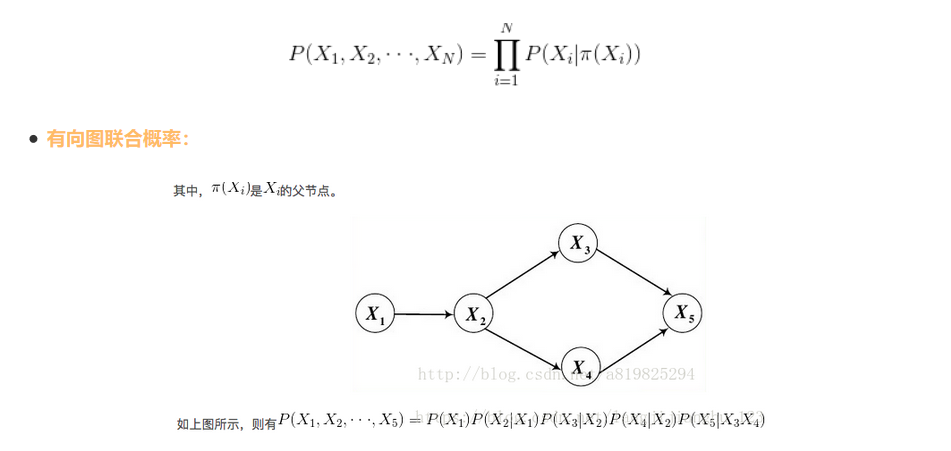

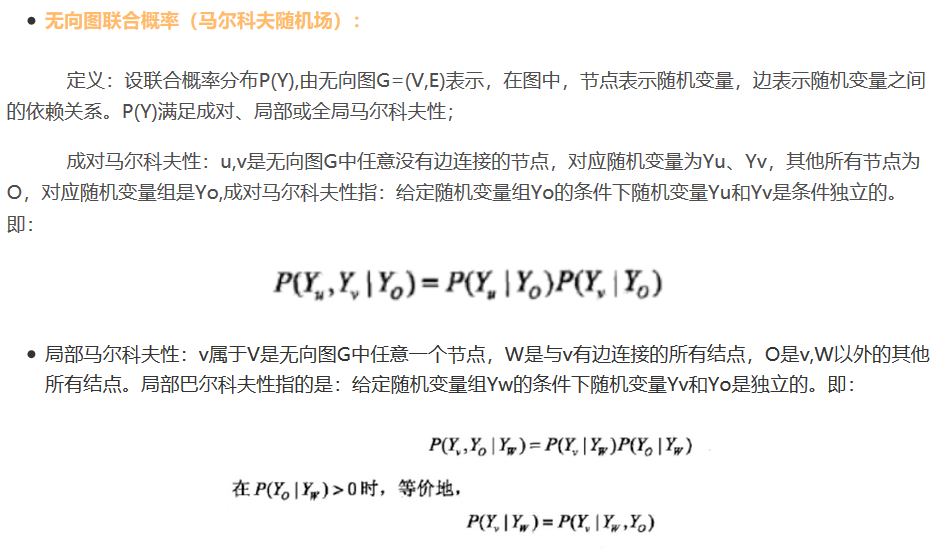

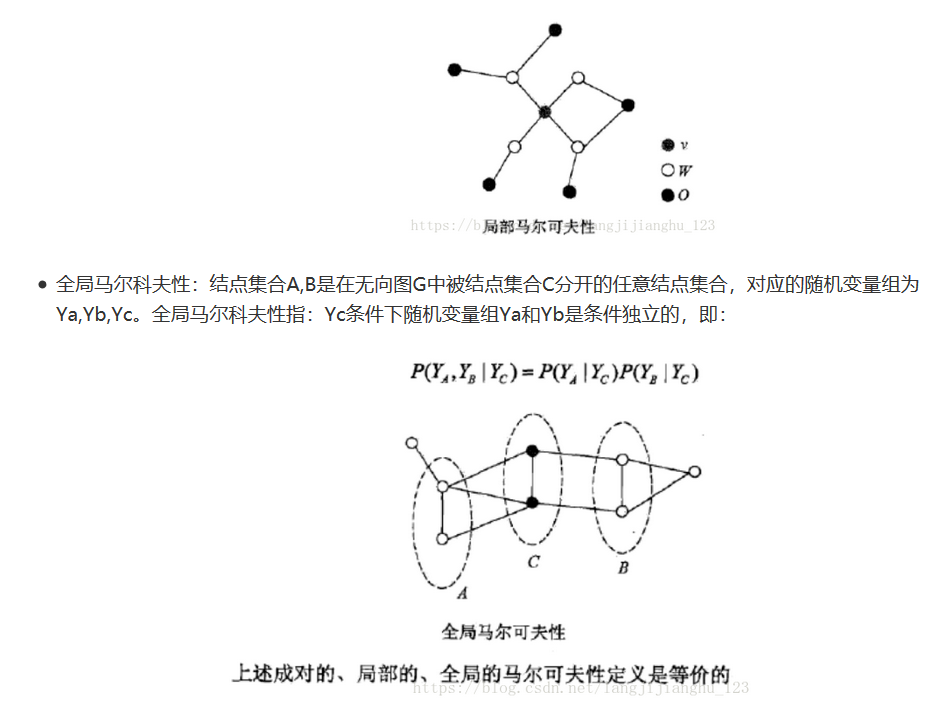

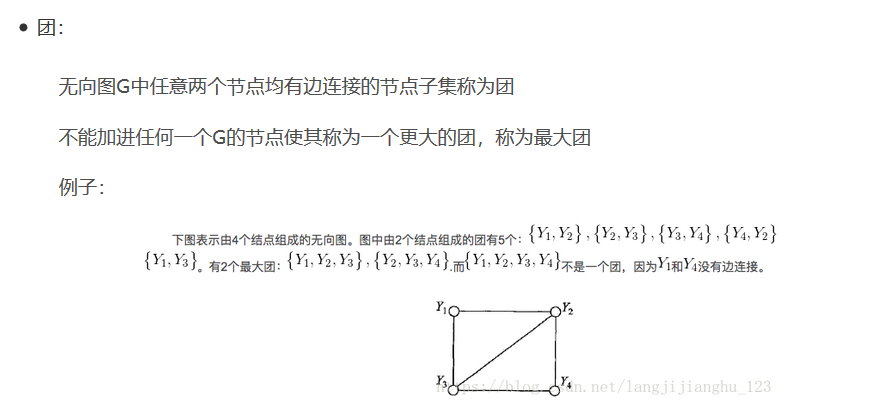

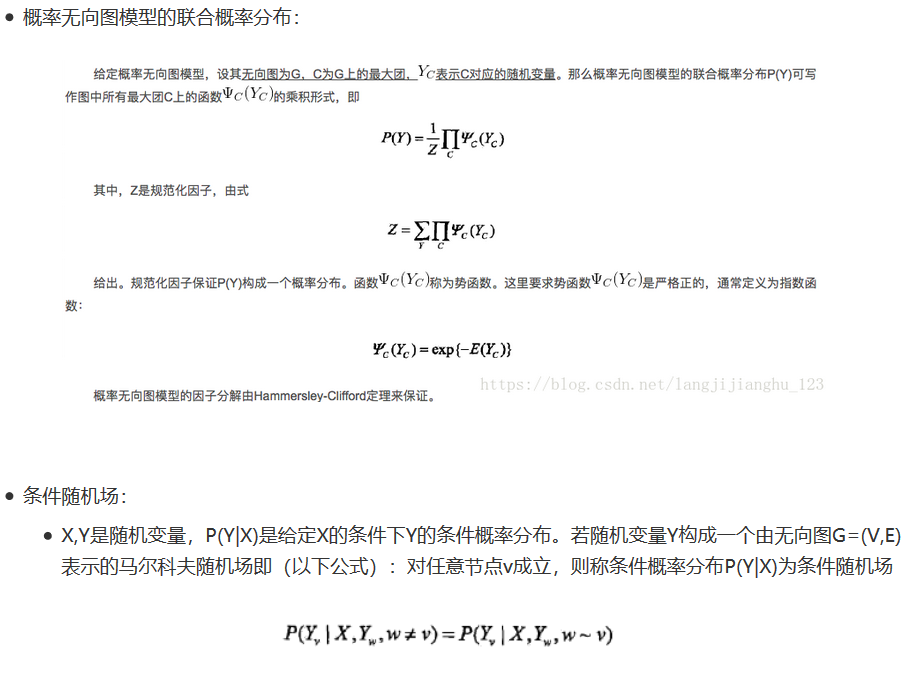

Conditional Random Field(CRF)

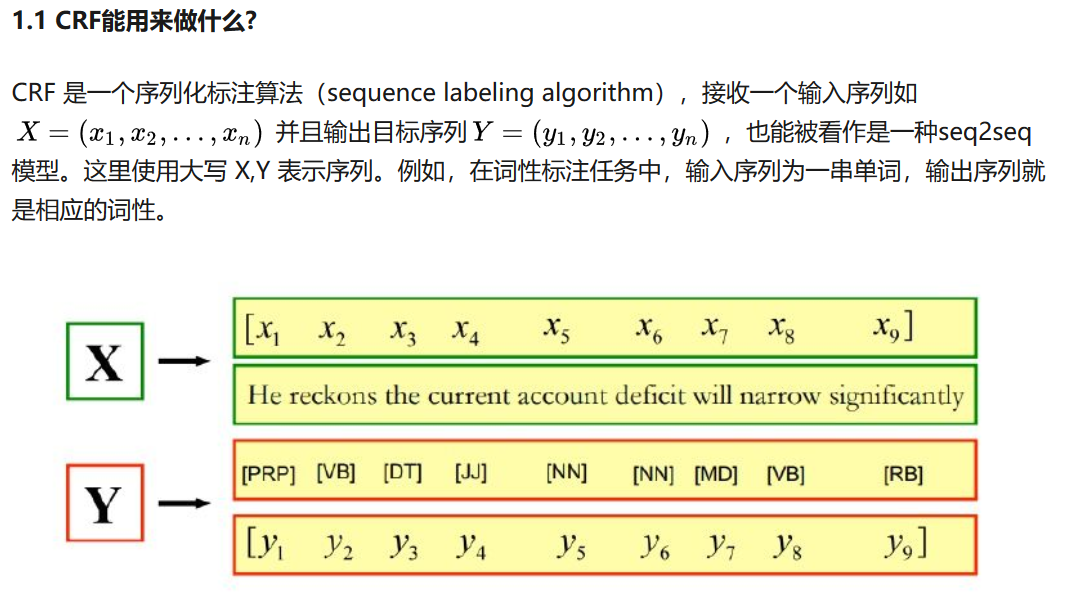

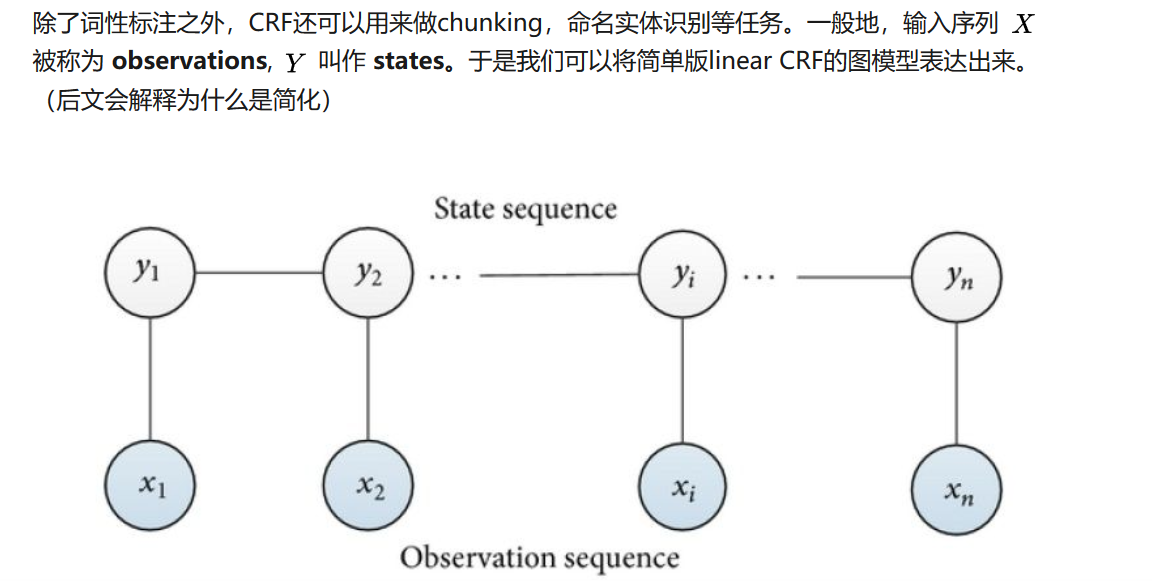

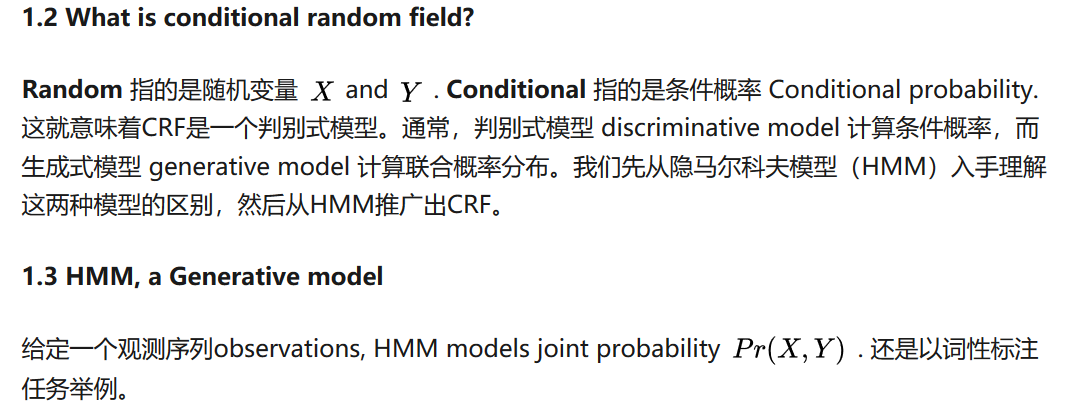

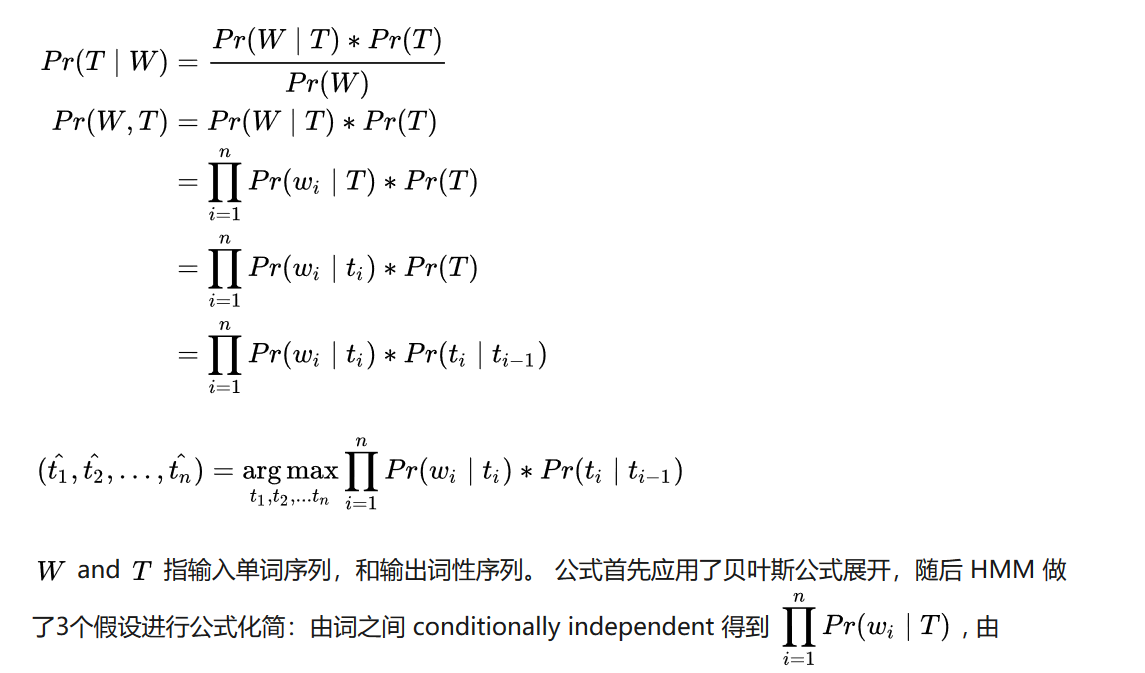

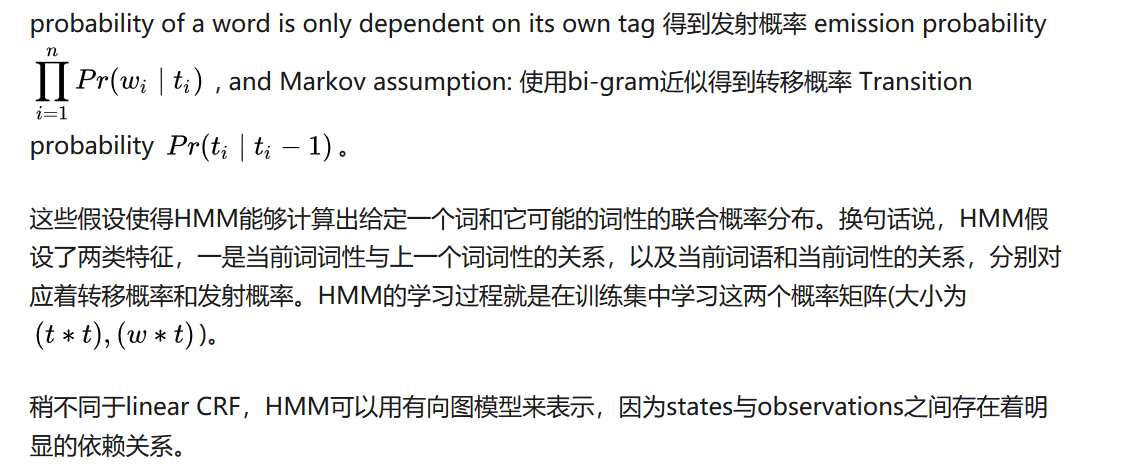

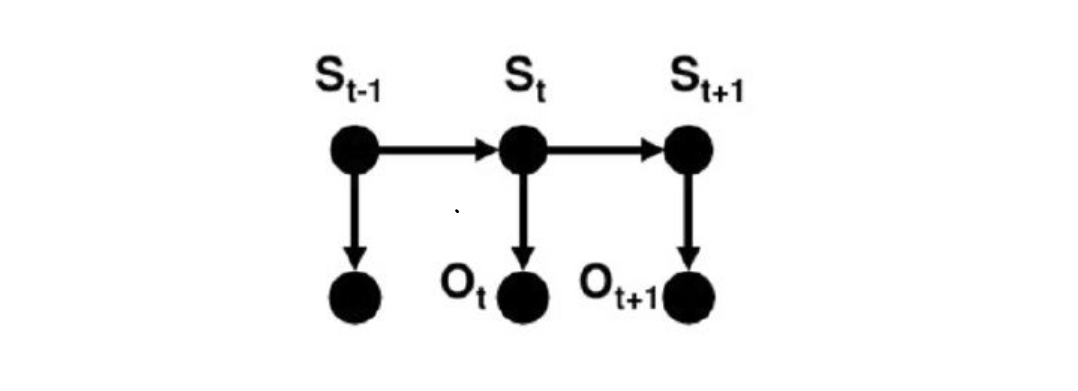

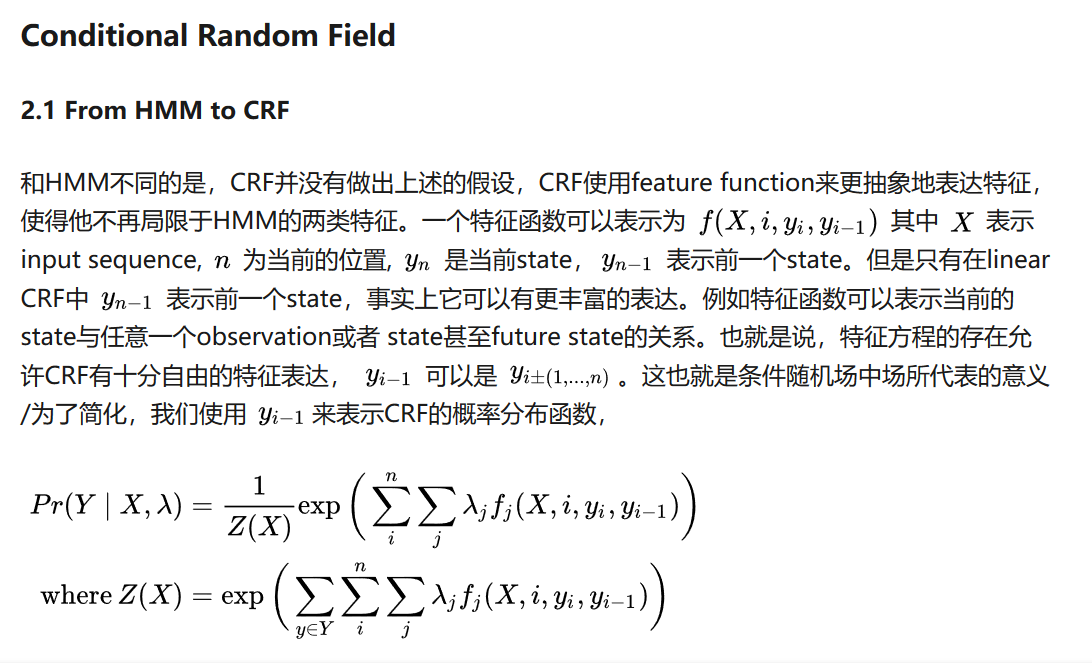

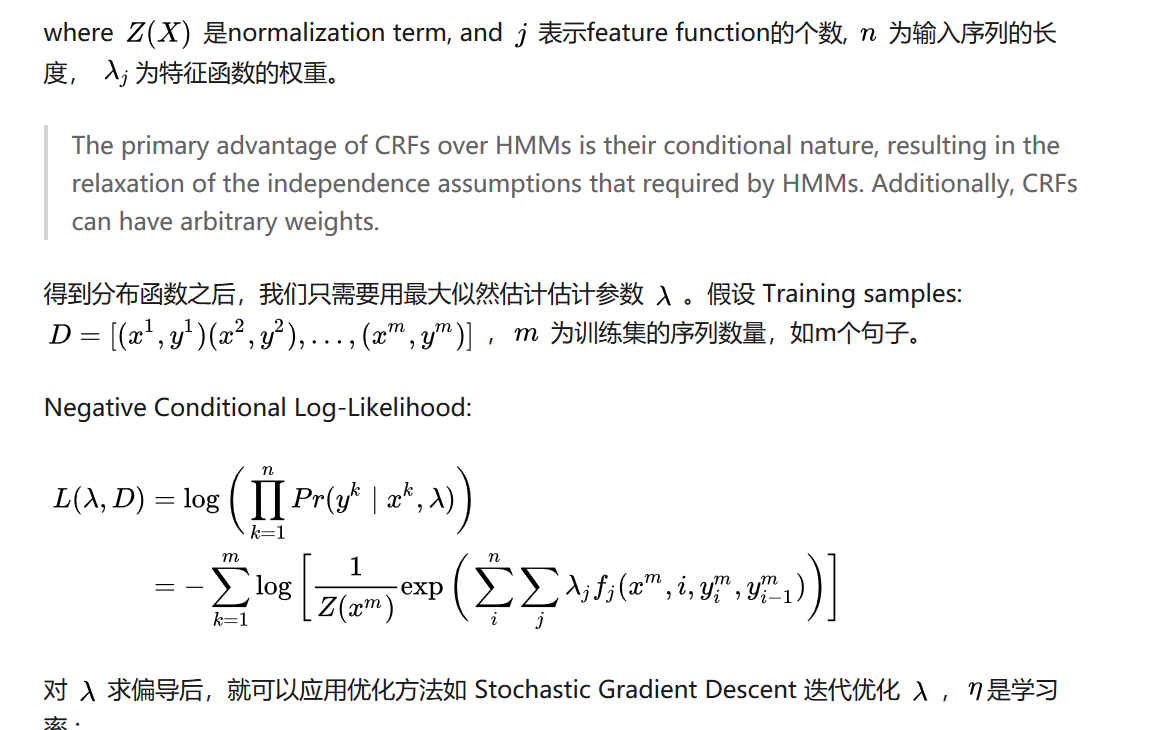

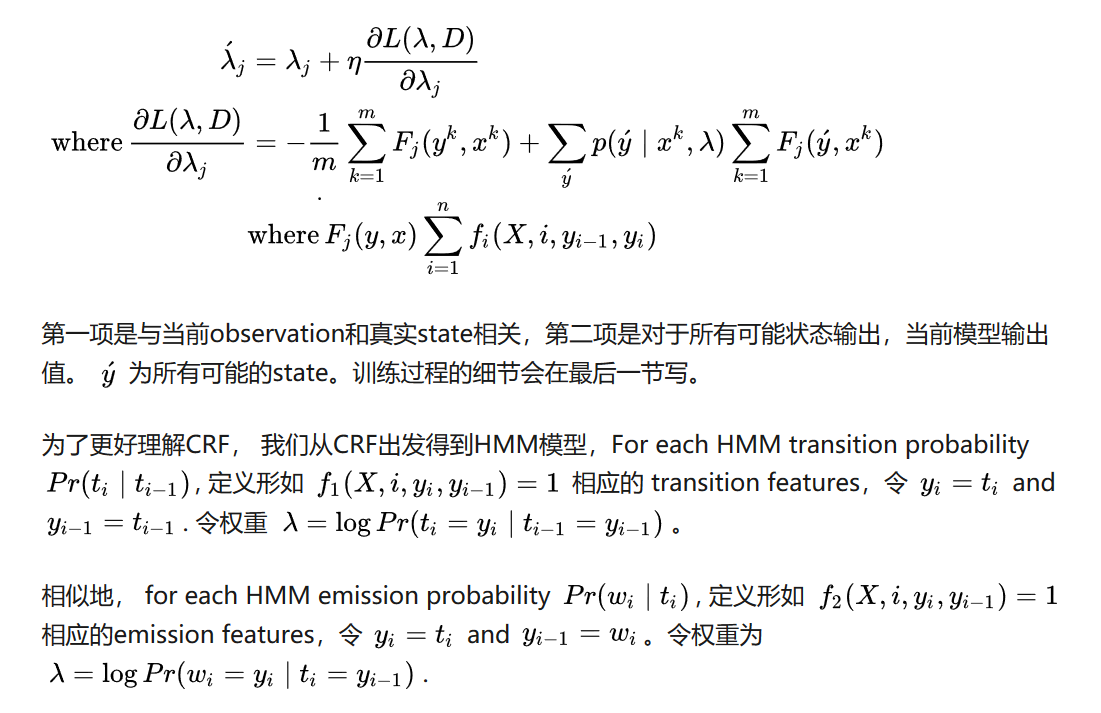

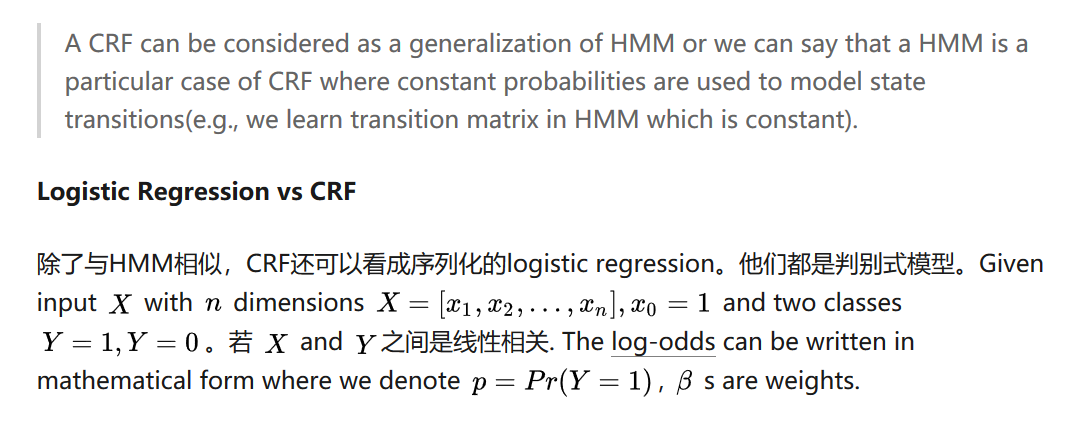

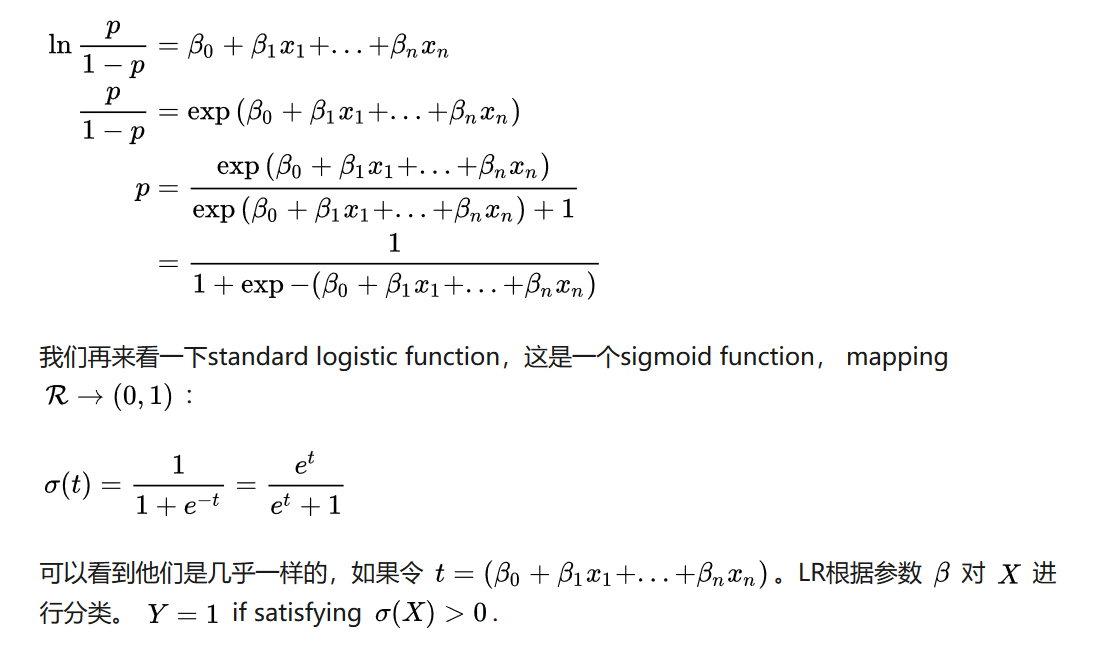